1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

3. In the first cell of your notebook, import the required packages with their customary aliases as follows (see the python below):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
- Take a look at the first 10 rows.
- Look at the last 5 rows. Do you see a problem?
- Redo the read_csv() call to correct this issue - do not modify the original csv file.

looked at that with the .head(10) and .tail() function, found out we have to remove the last 2 rows because they are footnotes

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

Done with 2 separate functions and then I aggregated them.

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

checked with gdp_df.info() and columns are object, int and float

In [4]:
gdp_df = (gdp_df
    .drop('Value Footnotes', axis=1)
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
    )  

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice? years 1990 - 2017; number of values increases with years

In [5]:
gdp_df['Year'].value_counts()

2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2018    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
2019    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations? There are 238 countries in the dataset, least represented Nauru, Cayman Islands, Sint Maarten, Turks and Caicos Islands, Djibouti. I'd imagine they were not countries yet in 1991

In [6]:
gdp_df['Country'].value_counts(sort=True)

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

interestingly, gdp_df[gdp_df['Country'] == 'Slovenia'] shows Slovenia as a country in 1990, which most definitely it wasn't until 1991

9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

10. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [7]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

poisson, unimodal, right skewed

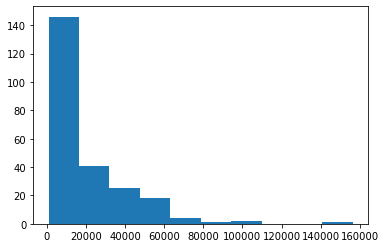

In [8]:
plt.hist(gdp_2014["GDP_Per_Capita"], bins=10)
plt.show()

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

Top 5: Macao SAR, China, Luxembourg, Quatar, Singapore, Bermuda.

Bottom 5: Niger, Dem. Rep. Congo, Malawi, Burundi, Central African Republic.

In [9]:
gdp_2014.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [10]:
#first select dataset for wanted years 1990, 2017 and then pivot on that, then drop any rows with NaN in
gdp_pivoted = (
    gdp_df
    [gdp_df["Year"].isin([1990, 2017])]
    .pivot_table(
        values = 'GDP_Per_Capita',
        index = 'Country',
        columns = 'Year')
    .dropna()
)

14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

Answer: 17 countries: gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].info()  (or without the .info if we want to look at them all)

In [11]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [12]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

Year,1990,2017,Percent_Change
Country,,,
Brunei,71230.862143,60995.681114,-14.369026
Burundi,1184.842440,773.571858,-34.710993
Central African Republic,1201.677234,912.802052,-24.039332
Comoros,3061.360665,3032.254682,-0.950753
Congo,5115.210903,4274.296414,-16.439488
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
Gabon,18179.265733,15006.764091,-17.451209
Guinea-Bissau,1994.669656,1925.237737,-3.480873
Haiti,3229.618638,2980.960856,-7.699292


16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

a: Equatorial Guinea and this formula would be to get ONLY the max, I.E. the highest: gdp_pivoted[gdp_pivoted['Percent_Change'] == gdp_pivoted['Percent_Change'].max()]. Using the code below we see the top 5, and second highest is China

Equatorial Guinea is all over the place. It appears to have reached a peak in about 2007/2008 and is then steadily in decline. Still a tremendous change in 2017 compared to 1990. China on the other hand I know a little bit more about. They have consistently subscribed to the philosophy of the "sleeping dragon" and over the years slowly but surely building up their economy. Slower growth, but consistent with likely no stopping in the near future. 

In [13]:
gdp_pivoted.sort_values('Percent_Change', ascending=False).head()

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945


In [14]:
#this below is the code for drawing the graph on 2 separate plots
#gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita', kind='line')
#gdp_df[gdp_df['Country'] == 'China'].plot(x='Year', y='GDP_Per_Capita', kind='line')
#plt.show()

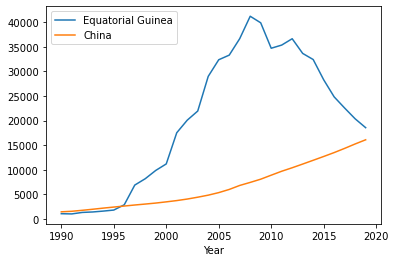

In [15]:
ax = gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita', kind='line')
gdp_df[gdp_df['Country'] == 'China'].plot(ax=ax, x='Year', y='GDP_Per_Capita', kind='line')
plt.legend(["Equatorial Guinea", "China"])
plt.show()

17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [16]:
#note: I checked the data with .head() and .tail()
continents = pd.read_csv('../data/continents.csv')

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [22]:
#the inner command, which is used by default, is what makes sure that the country appears in both sets
gdp_df = pd.merge(gdp_df, continents, how='inner', on='Country')

19. Determine the number of countries per continent. Create a bar chart showing this.

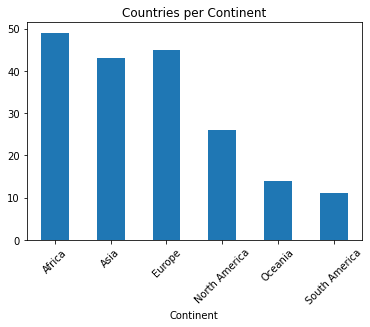

In [47]:
#since there's multiple countries for each year, drop all but one
# and then count by grouping around Continent, using Country as summary
# counting the number of countries (by continent)
# make a bar chart
(gdp_df
    .drop_duplicates(subset='Country')
    .groupby('Continent')['Country']
    .count()
    .plot(kind='bar', title='Countries per Continent', rot=45)
)
plt.show()

20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

all continents have outliers and all appear to be skewed to the right (towards higher GDP)

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Continent'>

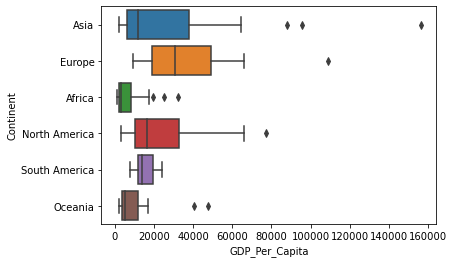

In [58]:
# first need to add continents to gdp_2014
# for seaborn, the "data =" needs to be there, can't just pass the dataframe or other object
gdp_2014 = pd.merge(gdp_2014, continents, how='inner', on='Country')
sns.boxplot(data=gdp_2014, x='GDP_Per_Capita', y='Continent')